#### Pulling waveforms by a list of evids tutorial notebook

- src/notebooks/pull_wf_by_evid_tutorial.ipynb
- It is a tutorial notebook for 'pull_wf_by_evids.py' module (access via src/python/pull_wf_by_evids.py).
- This notebook guides how to request waveform data from a client web server using evid lists. 
- Those evids are curated based on the well-located criteria:

1. 6+ observations (P or S wave picks): nobs >= 6

2. 4+ observing stations: nsta >= 4

3. no fixed values (depth, epicenter, or time): ['fdepth', 'fepi', 'ftime'] are set to False

4. a minimum observing station distance of no more than 10 km: distance <= 10

5. horizontal and vertical errors of 10 km or less: erhor & sdep <= 10

6. travel time RMS misfit of no more than 1 second: wrms <= 1

In [1]:
# import essential dependencies
import os,sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from obspy import read
from obspy.core import UTCDateTime
from obspy.clients.fdsn import Client

sys.path.append(os.path.join('..','..','src','python'))

from pull_wf_by_evids import *
from well_located_events import *

#### Step 1: Get well-located events

In [2]:
# define the relative root directory path
rrpath = os.path.join('..', '..')

In [3]:
# clean the original dataset
input_file1 = 'MtBaker_50km_radius_origins.csv'
cleaned_df = prep_data(input_file1)

In [4]:
# curate the well-located events
input_file2 = cleaned_df
curated_df = curate_events(input_file2)

#### Step 2: Get well-located event evids

In [5]:
# convert dataframe to list
curated_df_evid_list = curated_df['evid'].tolist()

#### Step 3: Prepare bulk requests based on evids

In [6]:
# fetch data from the CSV file
phases_df = format_aqms_csv('MtBaker_20km_radius_phases.csv')

In [7]:
# select phase data based on well-located evids
phases_df_well_located = get_phase_entries_list(phases_df, curated_df_evid_list)

In [8]:
# define pick parameter used to select the interested station (e.g., station 'MBW)
picks = phases_df_well_located[phases_df_well_located.sta == 'MBW'].iloc[:,:] if not phases_df_well_located.empty else None

In [9]:
picks

,evid,etype,orid,to_timestamp,origin_datetime,lat,lon,depth,mbs_src_km,arid,...,seedchan,rflag,subsource,delta,seaz,ema,timeres,in_wgt,wgt,importance
61,10849673,eq,1170523,1979-05-03 15:56:04.54-07,1979-05-03T22:55:56.000000Z,48.783833,-121.784000,-0.066,2.644800,10842458.0,...,EHZ,F,UW2AQMS,8.600000,270.000000,NaN,-0.12,1.0,NaN,NaN
466,10204348,eq,481273,1986-04-18 02:08:17.34-08,1986-04-18T10:08:04.000000Z,48.839000,-121.867833,0.297,8.073916,2765408.0,...,EHZ,F,UW2AQMS,6.600000,201.600000,NaN,-0.01,1.0,NaN,NaN
1081,10262208,eq,539153,1990-06-20 19:12:06.49-07,1990-06-21T02:11:51.000000Z,48.859500,-121.896333,1.502,11.086137,3905798.0,...,EHZ,F,UW2AQMS,8.400000,182.300000,NaN,-0.12,1.0,NaN,NaN
2834,10809973,lf,2635643,2010-12-31 23:40:46.459999-08,2011-01-01T07:40:22.000000Z,48.809000,-121.783833,-0.890,4.548748,10291718.0,...,EHZ,F,UW2AQMS,9.000000,252.000000,90.0,-0.28,1.0,1.42,0.600
2845,10809973,lf,2635643,2010-12-31 23:40:46.459999-08,2011-01-01T07:40:22.000000Z,48.809000,-121.783833,-0.890,4.548748,13774433.0,...,EHZ,H,Jiggle,9.000000,252.000000,90.0,-0.43,1.0,0.71,0.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5023,61945642,lf,3237698,2023-08-29 03:01:28.33-07,2023-08-29T10:01:01.000000Z,48.758000,-121.837167,-0.650,2.346854,16556473.0,...,EHZ,H,Jiggle,5.531464,301.629590,93.0,-0.50,1.0,1.22,0.179
5061,61956746,lf,3238328,2023-09-02 23:27:21.759998-07,2023-09-03T06:26:54.000000Z,48.766333,-121.811333,-0.990,1.004731,16565993.0,...,EHZ,H,Jiggle,6.891898,286.662468,90.0,-0.98,1.0,1.08,0.157
5069,61957006,lf,3239208,2023-09-04 04:03:21.039997-07,2023-09-04T11:02:54.000000Z,48.775000,-121.855500,2.290,2.807167,16581043.0,...,EHZ,H,Jiggle,3.514697,286.692672,133.0,-0.43,1.0,1.52,0.517
5098,61949892,lf,3239258,2023-09-10 14:38:05.219997-07,2023-09-10T21:37:38.000000Z,48.772333,-121.845167,-1.010,2.063558,16582168.0,...,EHZ,H,Jiggle,4.325715,287.580780,90.0,-0.39,1.0,1.55,0.392


#### Step 4: Request waveform data based on interested evids

In [10]:
evids_list_ex = [61957006, 61949892]

In [11]:
get_waveforms_from_phases('IRIS', picks, phases_df_well_located, evids_list_ex)

Evid: 61957006, Retrieved Traces: 1
Evid: 61949892, Retrieved Traces: 1


[1 Trace(s) in Stream:
UW.MBW.01.EHZ | 2023-09-04T11:02:44.000000Z - 2023-09-04T11:03:35.900000Z | 10.0 Hz, 520 samples,
 1 Trace(s) in Stream:
UW.MBW.01.EHZ | 2023-09-10T21:37:29.000000Z - 2023-09-10T21:38:18.900000Z | 10.0 Hz, 500 samples]

Evid: 61957006, Retrieved Traces: 1
Evid: 61949892, Retrieved Traces: 1
1 Trace(s) in Stream:
UW.MBW.01.EHZ | 2023-09-04T11:02:44.000000Z - 2023-09-04T11:03:35.900000Z | 10.0 Hz, 520 samples
Attempting to save to: ../../results/waveforms/uw.61957006.mseed
Waveforms saved to ../../results/waveforms/uw.61957006.mseed


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/obspy/io/mseed/core.py:773: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


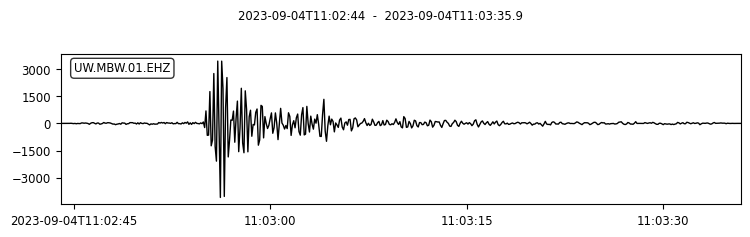

1 Trace(s) in Stream:
UW.MBW.01.EHZ | 2023-09-10T21:37:29.000000Z - 2023-09-10T21:38:18.900000Z | 10.0 Hz, 500 samples
Attempting to save to: ../../results/waveforms/uw.61957006.mseed
Waveforms saved to ../../results/waveforms/uw.61957006.mseed


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/obspy/io/mseed/core.py:773: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


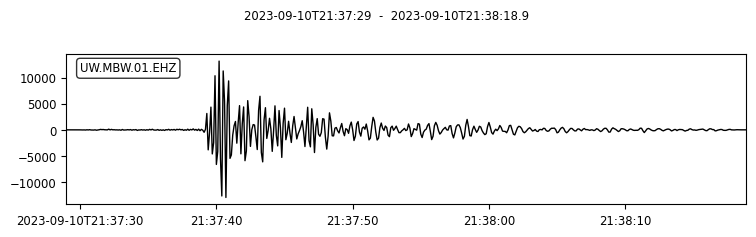

Evid: 61957006, Retrieved Traces: 1
Evid: 61949892, Retrieved Traces: 1
1 Trace(s) in Stream:
UW.MBW.01.EHZ | 2023-09-04T11:02:44.000000Z - 2023-09-04T11:03:35.900000Z | 10.0 Hz, 520 samples
Attempting to save to: ../../results/waveforms/uw.61949892.mseed
Waveforms saved to ../../results/waveforms/uw.61949892.mseed


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/obspy/io/mseed/core.py:773: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


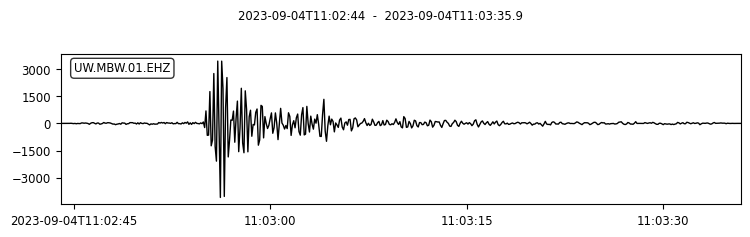

1 Trace(s) in Stream:
UW.MBW.01.EHZ | 2023-09-10T21:37:29.000000Z - 2023-09-10T21:38:18.900000Z | 10.0 Hz, 500 samples
Attempting to save to: ../../results/waveforms/uw.61949892.mseed
Waveforms saved to ../../results/waveforms/uw.61949892.mseed


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/obspy/io/mseed/core.py:773: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


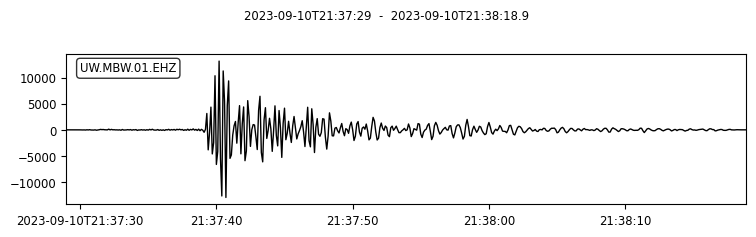

In [12]:
get_waveforms('MtBaker_50km_radius_origins.csv', 'MtBaker_20km_radius_phases.csv', evids_list_ex, 'IRIS', picks)

In [ ]:
# waveforms_path = os.path.join(rrpath, 'results', 'waveforms', 'uw.62049821.mseed')
# tr = read(waveforms_path)
# print(tr)